In [1]:
import os
import keras
import json
import glob
import sys
import pandas as pd
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse

from keras.utils.data_utils import get_file

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add,Normalization
from tensorflow.keras import models,optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2,l1,l1_l2
from tensorflow.keras.optimizers import Adam
! pip install keras_tuner
import keras_tuner as kt
from keras import backend as K
! pip install tensorflow-datasets
import tensorflow_datasets as tfds

import fnmatch
import re
import copy
import matplotlib.pyplot as plt
import scipy.signal
! pip install mpu
import mpu
import gc
import adjustText as at
#from script_onelist_colab import norm_int,repair,csv_exp,sel_exp,maxima,import_raw,read_processed,read_processed_sel,correct,onelist,interpolate_mat,interpolation_spectra

def touch(fname):
    if os.path.exists(fname):
        os.utime(fname, None)
    else:
        os.mkdir(fname)

#folder='/content/drive/MyDrive/PhD/CD_ML/CD_ML/alciML/csv/'
#if not os.path.abspath('')=='/content/drive/MyDrive/PhD/CD_ML/CD_ML/alciML/csv':
#  os.chdir(folder)
#print(os.path.abspath(''))  
#touch(folder+'png')





In [2]:
plt.rcParams.update({'font.size':21, 'font.family':'Times New Roman'})

In [3]:
df3=pd.read_pickle('PL_LT_augmented_onemat_pd4.pkl')
df3=df3.sample(frac=1)
beverages=pd.read_pickle('PL_LT_beverage_onemat_pd_2.pkl')
beverages=beverages.sample(frac=1)
beverages['alcohol_concentration']=beverages['alcohol_concentration']/100

In [4]:
np.amax(beverages['100_PLspec'].iloc[11])

23628

In [5]:
def dropzero(df,colu,size):
  listl=[]
  for i in range(len(df[colu])):
    if np.shape(df[colu].iloc[i]) != size:
      listl.append(df.index.values[i])
  for k in listl:
    print(listl)
    print(len(listl))
    df=df.drop(k)
  return df

def fill(x,source):
  y=x
  for col in source.columns:

    if np.isnan(np.amax(np.amax(x[col]))):
      nancheck=0
      while nancheck==0:
        newval=source[col].iloc[np.random.randint(0,len(source))]

        if not np.isnan(np.amax(np.amax(newval))):
          print('yes')
          nancheck=1
     # print(np.shape(noise(newval)))
      y[col]=noise(newval)    
  return y

def monoExp(x, m, t, b):
    return m * np.exp(-x/t) + b

def monoexp_dec_df(value):
  argmax=np.argmax(value[:,1])
  xv=np.asarray((value[argmax:,0]-value[argmax-1,0])/1023*200, dtype=np.longdouble)
  yv=np.asarray(value[argmax:,1]/65535, dtype=np.longdouble)
  p0=(1,3,0.002)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv, p0)
  m, t, b = params
  print(t)
  return params

In [6]:
df3=dropzero(df3,"300_LT405spec",(1024,2))
df3=dropzero(df3,"300_LT450spec",(1024,2))
df3=dropzero(df3,"150_LT405spec",(1024,2))
df3=dropzero(df3,"150_LT450spec",(1024,2))
df3=dropzero(df3,"100_LT405spec",(1024,2))
df3=dropzero(df3,"100_LT450spec",(1024,2))
df3=dropzero(df3,"300_PLspec",(16,217))
df3=dropzero(df3,"150_PLspec",(16,217))
df3=dropzero(df3,"100_PLspec",(16,217))

[94]
1


In [7]:
beverages

,beverage,alcohol_concentration,blank_LT405spec,blank_LT450spec,blank_PLspec,300_LT405spec,300_LT450spec,300_PLspec,150_LT405spec,150_LT450spec,150_PLspec,100_LT405spec,100_LT450spec,100_PLspec
13,bitburgerpils,0.048,"[[0, 83], [1, 83], [2, 91], [3, 100], [4, 102]...","[[0, 72], [1, 72], [2, 77], [3, 87], [4, 93], ...","[[300, 0, 0, 15, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0,...","[[0, 128], [1, 127], [2, 140], [3, 145], [4, 1...","[[0, 138], [1, 139], [2, 180], [3, 131], [4, 1...","[[300, 6, 14, 0, 7, 7, 3, 9, 0, 0, 5, 17, 11, ...","[[0, 80], [1, 80], [2, 76], [3, 76], [4, 78], ...","[[0, 84], [1, 85], [2, 90], [3, 91], [4, 102],...","[[300, 8, 2, 0, 0, 0, 0, 7, 5, 6, 0, 4, 1, 0, ...","[[0, 147], [1, 147], [2, 153], [3, 126], [4, 1...","[[0, 96], [1, 96], [2, 107], [3, 106], [4, 118...","[[300, 8, 6, 15, 5, 0, 2, 12, 0, 0, 0, 3, 0, 0..."
11,whitewine,0.135,"[[0, 88], [1, 88], [2, 86], [3, 86], [4, 91], ...","[[0, 92], [1, 92], [2, 82], [3, 80], [4, 89], ...","[[300, 9, 30, 40, 79, 109, 0, 0, 0, 0, 64, 50,...","[[0, 485], [1, 483], [2, 542], [3, 507], [4, 4...","[[0, 2287], [1, 2294], [2, 2179], [3, 2215], [...","[[300, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...","[[0, 106], [1, 107], [2, 114], [3, 105], [4, 1...","[[0, 821], [1, 821], [2, 783], [3, 679], [4, 7...","[[300, 0, 10, 3, 9, 8, 0, 1, 8, 0, 6, 12, 6, 0...","[[0, 64], [1, 64], [2, 59], [3, 58], [4, 59], ...","[[0, 199], [1, 200], [2, 225], [3, 215], [4, 2...","[[300, 0, 21, 0, 0, 20, 9, 15, 0, 0, 1, 0, 1, ..."
10,whitewine,0.135,"[[0, 88], [1, 88], [2, 86], [3, 85], [4, 90], ...","[[0, 91], [1, 91], [2, 81], [3, 79], [4, 87], ...","[[300, 10, 30, 40, 80, 109, 0, 0, 0, 0, 65, 50...","[[0, 476], [1, 476], [2, 535], [3, 500], [4, 4...","[[0, 2267], [1, 2267], [2, 2160], [3, 2192], [...","[[300, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, ...","[[0, 104], [1, 104], [2, 112], [3, 102], [4, 1...","[[0, 800], [1, 800], [2, 765], [3, 661], [4, 6...","[[300, 13, 0, 12, 2, 1, 13, 10, 0, 5, 1, 1, 3,...","[[0, 64], [1, 64], [2, 58], [3, 57], [4, 58], ...","[[0, 193], [1, 193], [2, 218], [3, 210], [4, 2...","[[300, 0, 22, 0, 0, 21, 9, 15, 0, 0, 1, 0, 2, ..."
8,absolut,0.400,"[[0, 85], [1, 85], [2, 103], [3, 76], [4, 82],...","[[0, 104], [1, 104], [2, 90], [3, 106], [4, 78...","[[300, 1751, 3004, 4043, 5212, 6410, 7037, 703...","[[0, 90], [1, 90], [2, 95], [3, 91], [4, 107],...","[[0, 98], [1, 98], [2, 95], [3, 98], [4, 104],...","[[300, 13, 13, 4, 0, 0, 0, 2, 4, 0, 0, 2, 0, 0...","[[0, 66], [1, 66], [2, 68], [3, 79], [4, 69], ...","[[0, 64], [1, 64], [2, 63], [3, 54], [4, 75], ...","[[300, 0, 5, 2, 8, 0, 7, 0, 1, 7, 5, 1, 8, 0, ...","[[0, 58], [1, 58], [2, 60], [3, 67], [4, 53], ...","[[0, 71], [1, 71], [2, 64], [3, 66], [4, 77], ...","[[300, 0, 9, 1, 23, 4, 25, 0, 5, 0, 6, 0, 17, ..."
4,bitburgerdrive,0.000,"[[0, 87], [1, 87], [2, 83], [3, 85], [4, 86], ...","[[0, 73], [1, 73], [2, 87], [3, 75], [4, 87], ...","[[300, 0, 0, 15, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0,...","[[0, 75], [1, 75], [2, 83], [3, 97], [4, 77], ...","[[0, 68], [1, 68], [2, 106], [3, 96], [4, 98],...","[[300, 0, 0, 4, 0, 0, 2, 5, 0, 0, 0, 0, 11, 0,...","[[0, 136], [1, 136], [2, 134], [3, 128], [4, 1...","[[0, 75], [1, 75], [2, 73], [3, 69], [4, 75], ...","[[300, 6, 0, 2, 2, 8, 0, 2, 0, 0, 2, 3, 0, 9, ...","[[0, 73], [1, 73], [2, 79], [3, 101], [4, 90],...","[[0, 102], [1, 102], [2, 109], [3, 88], [4, 10...","[[300, 0, 5, 8, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, ..."
12,bitburgerpils,0.048,"[[0, 83], [1, 83], [2, 91], [3, 100], [4, 102]...","[[0, 73], [1, 73], [2, 87], [3, 75], [4, 87], ...","[[300, 45, 0, 10, 0, 0, 0, 60, 149, 0, 20, 0, ...","[[0, 125], [1, 125], [2, 137], [3, 142], [4, 1...","[[0, 138], [1, 138], [2, 178], [3, 130], [4, 1...","[[300, 7, 14, 0, 7, 7, 3, 9, 0, 0, 6, 18, 11, ...","[[0, 79], [1, 79], [2, 74], [3, 75], [4, 77], ...","[[0, 84], [1, 84], [2, 90], [3, 91], [4, 101],...","[[300, 9, 3, 0, 0, 0, 0, 7, 5, 7, 0, 4, 1, 0, ...","[[0, 115], [1, 115], [2, 124], [3, 126], [4, 1...","[[0, 102], [1, 102], [2, 113], [3, 102], [

In [8]:
# df3.to_pickle('PL_LT_augmented_onemat_pd_dropna.pkl')

In [9]:
m=df3['blank_LT405spec'].isna()
l=m.sum()
s = np.random.choice(df3['blank_LT405spec'].dropna(), size=l)
df3.loc[m, 'blank_LT405spec'] = s

m=df3['blank_LT450spec'].isna()
l=m.sum()
s = np.random.choice(df3['blank_LT450spec'].dropna(), size=l)
df3.loc[m, 'blank_LT450spec'] = s

m=df3['blank_PLspec'].isna()
l=m.sum()
s = np.random.choice(df3['blank_PLspec'].dropna(), size=l)
df3.loc[m, 'blank_PLspec'] = s

In [10]:
def plot_data_LT(source, sets, rows, cols, lower_value, upper_value):
    fig = plt.figure(figsize=(cols*4,rows*3))
    for i in range(1, cols*rows + 1):
        k = np.random.randint(lower_value,upper_value)
        fig.add_subplot(rows, cols, i) # adding sub plot
        alc = source.alcohol_concentration.iloc[k]
        alc=str("{:10.1f}".format(alc*100))+'%' 
        plot_lt(source,k,sets)
        # plt.axis('off')
        plt.title(f'Alcohol Concentration:{alc}')
    plt.tight_layout()
    plt.show()

def plot_lt(source,ind,sets):
  argmax=np.argmax(source.iloc[ind][sets][:,1])
  xv=np.asarray((source.iloc[ind][sets][argmax:,0]-source.iloc[ind][sets][argmax-1,0])/1023*200, dtype=np.longdouble)
  yv=np.asarray(source.iloc[ind][sets][argmax:,1]/65535, dtype=np.longdouble)
  p0=(1,3,0.002)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv, p0)
  m, t, b = params
  plt.plot(xv,yv) 
  lbl='Lifetime'+("{:10.2f}".format(t))+'ns' 
  plt.plot(xv, monoExp(xv, m, t, b), '--', label=lbl) 
  plt.xlim(0,60)
  plt.ylim(-0.05,1.1)
  plt.text(33,0.97,lbl)
  plt.xlabel('Time (ns)')
  plt.ylabel('Intensity (a.u.)')
  # plt.savefig("png/LT_fit"+str(ind)+".png")

def plot_lt_pred(source,ind):
  plt.plot(np.arange(0,1024),Xobs[ind]) 
  plt.xlim(0,60)
  plt.ylim(-0.05,1.1)
  plt.xlabel('Time (ns)')
  plt.ylabel('Intensity (a.u.)')
  # plt.savefig("png/LT_fit"+str(ind)+".png")

def plot_data_PL(source, sets, rows, cols, lower_value, upper_value):
    fig = plt.figure(figsize=(cols*4,rows*20))
    for i in range(1, cols*rows + 1):
        k = np.random.randint(lower_value,upper_value)
        fig.add_subplot(rows, cols, i) # adding sub plot
        alc = source.alcohol_concentration.iloc[k]
        alc=str("{:10.1f}".format(alc*100))+'%'
        im = source.loc[:,sets].iloc[k]
        plt.imshow(im,extent=[320,750,300,600],origin="lower")
        plt.axis('off')
        plt.title(f'Alcohol Concentration:{alc}')
    plt.tight_layout()
    plt.show()

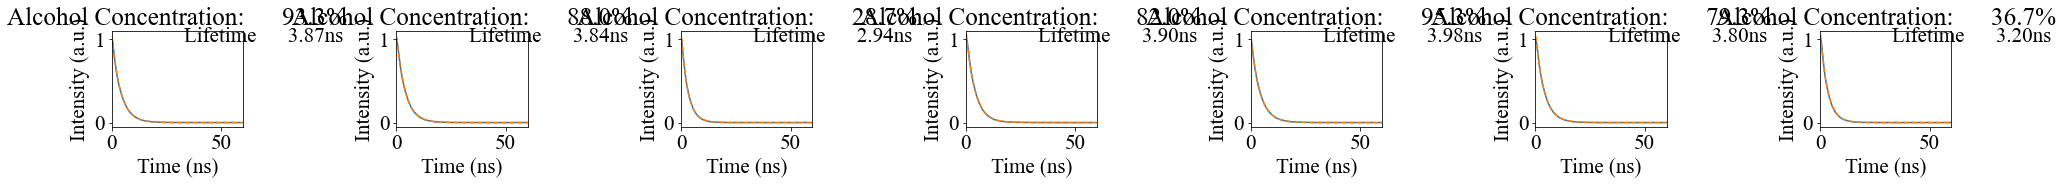

In [11]:
plot_data_LT(source=df3,sets='100_LT450spec',rows=1, cols=7, lower_value=0, upper_value=len(df3))

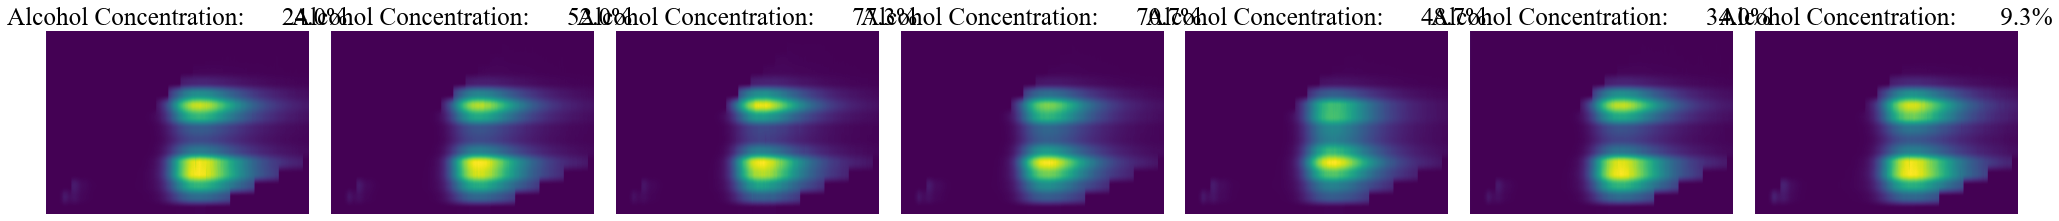

In [12]:
plot_data_PL(source=df3,sets="100_PLspec",rows=1, cols=7, lower_value=0, upper_value=len(df3))

In [13]:
def XY_creation_LT(source,colu):
  X = np.zeros(shape=(len(source[colu]),1024))
  for i in range(len(source[colu])):
    X[i] = source[colu].iloc[i][:,1]/65535
  print(X.dtype)

  #Alcohol
  ac = source['alcohol_concentration']
  ac=ac.astype(float)*100
  ac= np.array(ac)
  labels_f =[]
  i=0
  while i <len(ac):
    label=[]
    label.append([ac[i]])
    labels_f.append(label)
    i+=1
  labels_f =np.array(labels_f)
  labels_f.shape
  return X,ac

def XY_creation_PL(source,colu):
  X = np.zeros(shape=(len(source[colu]),16,217))
  for i in range(len(source[colu])):
    X[i] = source[colu].iloc[i]/65535
  print(X.dtype)

  #Alcohol
  ac = source['alcohol_concentration']
  ac=ac.astype(float)*100
  ac= np.array(ac)
  labels_f =[]
  i=0
  while i <len(ac):
    label=[]
    label.append([ac[i]])
    labels_f.append(label)
    i+=1
  labels_f =np.array(labels_f)
  labels_f.shape
  return X,labels_f

In [14]:
def XY_creation_LTn(source,colu):
  X = np.zeros(shape=(len(source[colu]),1024))
  for i in range(len(source[colu])):
    X[i] = source[colu].iloc[i][:,1]/np.amax(source[colu].iloc[i][:,1])
  print(X.dtype)

  #Alcohol
  ac = source['alcohol_concentration']
  ac=ac.astype(float)*100
  ac= np.array(ac)
  labels_f =[]
  i=0
  while i <len(ac):
    label=[]
    label.append([ac[i]])
    labels_f.append(label)
    i+=1
  labels_f =np.array(labels_f)
  labels_f.shape
  return X,ac

def XY_creation_PLn(source,colu):
  X = np.zeros(shape=(len(source[colu]),16,217))
  for i in range(len(source[colu])):
    X[i] = source[colu].iloc[i]/np.amax(source[colu].iloc[i][:,1])
  print(X.dtype)

  #Alcohol
  ac = source['alcohol_concentration']
  ac=ac.astype(float)*100
  ac= np.array(ac)
  labels_f =[]
  i=0
  while i <len(ac):
    label=[]
    label.append([ac[i]])
    labels_f.append(label)
    i+=1
  labels_f =np.array(labels_f)
  labels_f.shape
  return X,labels_f

In [15]:
LT100450,labels100LT=XY_creation_LT(df3.iloc[50:,:],"100_LT450spec")
LT100405,labels100LT=XY_creation_LT(df3.iloc[50:,:],"100_LT405spec")
PL100,labels100PL=XY_creation_PL(df3.iloc[50:,:],"100_PLspec")
LT150450,labels150LT=XY_creation_LT(df3.iloc[50:,:],"150_LT450spec")
LT150405,labels150LT=XY_creation_LT(df3.iloc[50:,:],"150_LT405spec")
PL150,labels150PL=XY_creation_PL(df3.iloc[50:,:],"150_PLspec")
LT300450,labels300LT=XY_creation_LT(df3.iloc[50:,:],"300_LT450spec")
LT300405,labels300LT=XY_creation_LT(df3.iloc[50:,:],"300_LT405spec")
PL300,labels300PL=XY_creation_PL(df3.iloc[50:,:],"300_PLspec")
LTblank450,labelsblankLT=XY_creation_LT(df3.iloc[50:,:],"blank_LT450spec")
LTblank405,labelsblankLT=XY_creation_LT(df3.iloc[50:,:],"blank_LT405spec")
PLblank,labelsblankPL=XY_creation_PL(df3.iloc[50:,:],"blank_PLspec")

LT100450_hold,labels100LT_hold=XY_creation_LT(df3.iloc[:50,:],"100_LT450spec")
LT100405_hold,labels100LT_hold=XY_creation_LT(df3.iloc[:50,:],"100_LT405spec")
PL100_hold,labels100PL_hold=XY_creation_PL(df3.iloc[:50,:],"100_PLspec")
LT150450_hold,labels150LT_hold=XY_creation_LT(df3.iloc[:50,:],"150_LT450spec")
LT150405_hold,labels150LT_hold=XY_creation_LT(df3.iloc[:50,:],"150_LT405spec")
PL150_hold,labels150PL_hold=XY_creation_PL(df3.iloc[:50,:],"150_PLspec")
LT300450_hold,labels300LT_hold=XY_creation_LT(df3.iloc[:50,:],"300_LT450spec")
LT300405_hold,labels300LT_hold=XY_creation_LT(df3.iloc[:50,:],"300_LT405spec")
PL300_hold,labels300PL_hold=XY_creation_PL(df3.iloc[:50,:],"300_PLspec")
LTblank450_hold,labelsblankLT_hold=XY_creation_LT(df3.iloc[:50,:],"blank_LT450spec")
LTblank405_hold,labelsblankLT_hold=XY_creation_LT(df3.iloc[:50,:],"blank_LT405spec")
PLblank_hold,labelsblankPL_hold=XY_creation_PL(df3.iloc[:50,:],"blank_PLspec")

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [16]:
bevLT100450,bevlabels100LT=XY_creation_LT(beverages,"100_LT450spec")
bevLT100405,bevlabels100LT=XY_creation_LT(beverages,"100_LT405spec")
bevPL100,bevlabels100PL=XY_creation_PL(beverages,"100_PLspec")
bevLT150450,bevlabels150LT=XY_creation_LT(beverages,"150_LT450spec")
bevLT150405,bevlabels150LT=XY_creation_LT(beverages,"150_LT405spec")
bevPL150,bevlabels150PL=XY_creation_PL(beverages,"150_PLspec")
bevLT300450,bevlabels300LT=XY_creation_LT(beverages,"300_LT450spec")
bevLT300405,bevlabels300LT=XY_creation_LT(beverages,"300_LT405spec")
bevPL300,bevlabels300PL=XY_creation_PL(beverages,"300_PLspec")
bevLTblank450,bevlabelsblankLT=XY_creation_LT(beverages,"blank_LT450spec")
bevLTblank405,bevlabelsblankLT=XY_creation_LT(beverages,"blank_LT405spec")
bevPLblank,bevlabelsblankPL=XY_creation_PL(beverages,"blank_PLspec")

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [17]:
(PL150_train,PL150_test, LT150450_train,LT150450_test, LT150405_train,LT150405_test, Y150_train,Y150_test, 
PL100_train,PL100_test, LT100450_train,LT100450_test,LT100405_train,LT100405_test, Y100_train,Y100_test,
PL300_train,PL300_test, LT300450_train,LT300450_test, LT300405_train,LT300405_test, Y300_train,Y300_test, 
PLblank_train,PLblank_test, LTblank450_train,LTblank450_test,LTblank405_train,LTblank405_test, Yblank_train,Yblank_test)= train_test_split(
    PL150, LT150450, LT150405,labels150LT,PL100, LT100450, LT100405,labels100LT,
    PL300, LT300450, LT300405,labels300LT,PLblank, LTblank450, LTblank405,labelsblankLT,test_size=0.4)


In [18]:
trainset = tf.data.Dataset.from_tensors(
   {"PL150in": tf.expand_dims(PL150_train,-1),
   "LT150405in":LT150405_train,
   "LT150450in":LT150450_train,
   "PL100in":tf.expand_dims(PL100_train,-1),
   "LT100405in":LT100405_train,
   "LT100450in":LT100450_train,
   "PL300in":tf.expand_dims(PL300_train,-1),
   "LT300405in":LT300405_train,
   "LT300450in":LT300450_train,
   "PLblankin":tf.expand_dims(PLblank_train,-1),
   "LTblank405in":LTblank405_train,
   "LTblank450in":LTblank450_train,
   })
trainlabel=tf.data.Dataset.from_tensors(Y100_train[:,np.newaxis])
train=tf.data.Dataset.zip((trainset, trainlabel))
train=train.unbatch()


testset = tf.data.Dataset.from_tensors(
   {"PL150in":tf.expand_dims(PL150_test,-1),
   "LT150405in":LT150405_test,
   "LT150450in":LT150450_test,
   "PL100in":tf.expand_dims(PL100_test,-1),
   "LT100405in":LT100405_test,
   "LT100450in":LT100450_test,
   "PL300in":tf.expand_dims(PL300_test,-1),
   "LT300405in":LT300405_test,
   "LT300450in":LT300450_test,
   "PLblankin":tf.expand_dims(PLblank_test,-1),
   "LTblank405in":LTblank405_test,
   "LTblank450in":LTblank450_test,
   })
testlabel=tf.data.Dataset.from_tensors(Y100_test[:,np.newaxis])
test=tf.data.Dataset.zip((testset, testlabel))
test=test.unbatch()

holdset = tf.data.Dataset.from_tensors(
   {"PL150in":tf.expand_dims(PL150_hold,-1),
   "LT150405in":tf.expand_dims(LT150405_hold,-1),
   "LT150450in":tf.expand_dims(LT150450_hold,-1),
   "PL100in":tf.expand_dims(PL100_hold,-1),
   "LT100405in":LT100405_hold,
   "LT100450in":LT100450_hold,
   "PL300in":tf.expand_dims(PL300_hold,-1),
   "LT300405in":tf.expand_dims(LT300405_hold,-1),
   "LT300450in":tf.expand_dims(LT300450_hold,-1),
   "PLblankin":tf.expand_dims(PLblank_hold,-1),
   "LTblank405in":tf.expand_dims(LTblank405_hold,-1),
   "LTblank450in":tf.expand_dims(LTblank450_hold,-1)
   })
holdlabel=tf.data.Dataset.from_tensors(labels100LT_hold[:,np.newaxis])
hold=tf.data.Dataset.zip((holdset, holdlabel))
hold=hold.unbatch()

#test = test.batch(1)
test = test.cache()
test = test.prefetch(tf.data.AUTOTUNE)
#train = train.batch(1)
train = train.cache()
train = train.prefetch(tf.data.AUTOTUNE)

bevset = tf.data.Dataset.from_tensors(
   {"PL150in": tf.expand_dims(bevPL150,-1),
   "LT150405in":bevLT150405,
   "LT150450in":bevLT150450,
   "PL100in":tf.expand_dims(bevPL100,-1),
   "LT100405in":bevLT100405,
   "LT100450in":bevLT100450,
   "PL300in":tf.expand_dims(bevPL300,-1),
   "LT300405in":bevLT300405,
   "LT300450in":bevLT300450,
   "PLblankin":tf.expand_dims(bevPLblank,-1),
   "LTblank405in":bevLTblank405,
   "LTblank450in":bevLTblank450,
   })
bevlabel=tf.data.Dataset.from_tensors(bevlabels100PL[:,np.newaxis])
bev=tf.data.Dataset.zip((bevset, bevlabel))
bev=bev.unbatch()

In [19]:
def scheduler(epoch, lr):
    if epoch < 300:
        return lr
    else:
        return lr * tf.math.exp(-0.0002)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [20]:
class LT_modelt:
  def __init__(self, inlabel,dense1=64,dense2=16,dropoutLT=0.2):
    self.input = Input((1024,),name=inlabel)
    self.norm = layers.LayerNormalization()(self.input)
    self.dense1= Dense(dense1,activation='relu')(self.norm)
    self.drop=Dropout(dropoutLT)(self.dense1)
    self.dense2=Dense(dense2,activation='relu')(self.drop)

class PL_modelt:
  def __init__(self, inlabel,input_shape,densePL=64,filter1=64,filter2=128,filter3=128,kernel1=3,kernel2=5,kernel3=9,dropoutPL1=0.2,dropoutPL2=0.2):
    self.input = Input((input_shape),name=inlabel)
    self.conv_1=Conv2D(filter1, (kernel2, kernel3), activation='relu', padding="same",input_shape=input_shape)(self.input)
    self.maxp_1 = MaxPooling2D(pool_size = (2,2)) (self.conv_1)
    self.drop1=Dropout(dropoutPL1)(self.maxp_1)
    self.conv_2=Conv2D(filter2, (kernel1, kernel2), activation='relu', padding="same")(self.drop1)
    self.maxp_2 = MaxPooling2D(pool_size = (2,2)) (self.conv_2)
    self.conv_3=Conv2D(filter3, (kernel1, kernel2), activation='relu', padding="same")(self.maxp_2)
    self.flatten=Flatten()(self.conv_3)
    self.drop2=Dropout(dropoutPL2)(self.flatten)
    self.densePL= Dense(densePL, activation='relu')(self.drop2)

In [21]:
class LT_model:
  def __init__(self, inlabel,dense1=64,dense2=16):
    self.input = Input((1024,),name=inlabel)
    self.norm = layers.LayerNormalization()(self.input)
    self.dense1= Dense(dense1,activation='relu')(self.norm)
    self.drop=Dropout(0.2)
    self.dense2=Dense(dense2,activation='relu')(self.dense1)

class LT_model_c:
  def __init__(self, inlabel):
    self.input = Input((1024,),name=inlabel)
    self.norm = layers.LayerNormalization()(self.input)
    self.dense1= Dense(8,activation='relu')(self.norm)
    self.dense2=Dense(32,activation='relu')(self.dense1)

class PL_model:
  def __init__(self, inlabel,input_shape,densePL=64):
    self.input = Input((input_shape),name=inlabel)
    self.conv_1=Conv2D(64, (5, 9), activation='relu', padding="same",input_shape=input_shape)(self.input)
    self.maxp_1 = MaxPooling2D(pool_size = (2,2)) (self.conv_1)
    self.drop=Dropout(0.1)
    self.conv_2=Conv2D(128, (3, 5), activation='relu', padding="same")(self.maxp_1)
    self.maxp_2 = MaxPooling2D(pool_size = (2,2)) (self.conv_2)
    self.conv_3=Conv2D(128, (3, 5), activation='relu', padding="same")(self.maxp_2)
    self.flatten=Flatten()(self.conv_3)
    self.drop=Dropout(0.3)
    self.densePL= Dense(densePL, activation='relu')(self.flatten)


In [22]:
LT100405=LT_modelt('LT100405in',dense1=64,dense2=16,dropoutLT=0.01)
LT100450=LT_modelt('LT100450in',dense1=64,dense2=16,dropoutLT=0.01)
concat = layers.concatenate([LT100450.dense2,LT100405.dense2])
dense4=Dense(8,activation='relu',kernel_regularizer=l2(0.001))(concat)
dropout=Dropout(0.0)(dense4)
output_2= Dense(1,activation="relu",name='alc_pred')(dropout)
model_duoLT = Model(inputs=[LT100450.input,LT100405.input], outputs=[output_2])
model_duoLT.compile(loss="mae", optimizer='adam',metrics="mae")
model_checkpoint_callback_duo = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/DNN_duoLT_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [23]:
LT100450=LT_modelt('LT100450in',dropoutLT=0.01)
#dense4=Dense(8,activation='relu')(concat)
output_2= Dense(1,activation="relu",name='alc_pred',kernel_regularizer=l2(0.001))(LT100450.dense2)
model_singleLT = Model(inputs=[LT100450.input], outputs=[output_2])
model_singleLT.compile(loss="mae", optimizer='adam',metrics="mae")
model_singleLT.save_weights('single_LT_default_weights')
model_checkpoint_callback_singleLT = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/DNN_singleLT_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

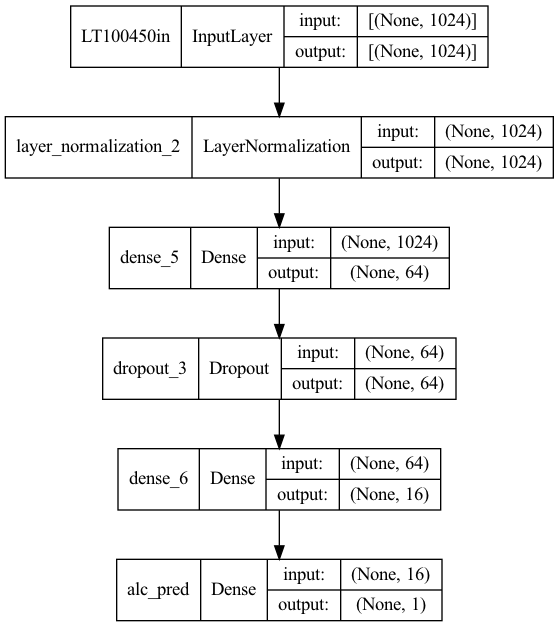

In [24]:
plot_model(model_singleLT, rankdir='TB',show_shapes=True,show_layer_names=True)
#model_concat.summary()

In [25]:
input_shape=(16,217,1)
filt1=32
filt2=64
filt3=128
kern1=3
kern2=5
kern3=9
denseP=32
dropout1=0.1
dropout2=0.2
dropoutlt=0.01
LT100405mod=LT_modelt('LT100405in',dense1=64,dense2=64,dropoutLT=dropoutlt)
LT100450mod=LT_modelt('LT100450in',dense1=64,dense2=64,dropoutLT=dropoutlt)
PL100mod=PL_modelt('PL100in',input_shape,densePL=denseP,filter1=filt1,filter2=filt2,filter3=filt3,kernel1=kern1,kernel2=kern2,kernel3=kern3,dropoutPL1=dropout1,dropoutPL2=dropout2)
LT150405mod=LT_modelt('LT150405in',dense1=64,dense2=64,dropoutLT=dropoutlt)
LT150450mod=LT_modelt('LT150450in',dense1=64,dense2=64,dropoutLT=dropoutlt)
PL150mod=PL_modelt('PL150in',input_shape,densePL=denseP,filter1=filt1,filter2=filt2,filter3=filt3,kernel1=kern1,kernel2=kern2,kernel3=kern3,dropoutPL1=dropout1,dropoutPL2=dropout2)
LT300405mod=LT_modelt('LT300405in',dense1=64,dense2=64,dropoutLT=dropoutlt)
LT300450mod=LT_modelt('LT300450in',dense1=64,dense2=64,dropoutLT=dropoutlt)
PL300mod=PL_modelt('PL300in',input_shape,densePL=denseP,filter1=filt1,filter2=filt2,filter3=filt3,kernel1=kern1,kernel2=kern2,kernel3=kern3,dropoutPL1=dropout1,dropoutPL2=dropout2)
LTblank405mod=LT_modelt('LTblank405in',dense1=64,dense2=64,dropoutLT=dropoutlt)
LTblank450mod=LT_modelt('LTblank450in',dense1=64,dense2=64,dropoutLT=dropoutlt)
PLblankmod=PL_modelt('PLblankin',input_shape,densePL=denseP,filter1=filt1,filter2=filt2,filter3=filt3,kernel1=kern1,kernel2=kern2,kernel3=kern3,dropoutPL1=dropout1,dropoutPL2=dropout2)


concat1 = layers.concatenate([LT100405mod.dense2,LT100450mod.dense2,PL100mod.densePL])
dense3=Dense(32,activation='relu',kernel_regularizer=l2(0.001))(concat1)
dropout=Dropout(0.01)(dense3)
output_2= Dense(1,activation="relu",name='alc_pred')(dropout)
model_combiPL = Model(inputs=[PL100mod.input,LT100405mod.input,LT100450mod.input], outputs=[output_2])
model_combiPL.compile(loss="mae", optimizer="adam",metrics="mae")

concat2 = layers.concatenate([LT100405mod.dense2,LT100450mod.dense2,PL100mod.densePL,LT150405mod.dense2,LT150450mod.dense2,PL150mod.densePL
                            ,LT300405mod.dense2,LT300450mod.dense2,PL300mod.densePL,LTblank405mod.dense2,LTblank450mod.dense2,PLblankmod.densePL])
dense4=Dense(64,activation='relu',kernel_regularizer=l2(0.001))(concat2)
dropout=Dropout(0.3)(dense4)
output_2= Dense(1,activation="relu",name='alc_pred')(dropout)
model_combiPL_bg = Model(inputs=[PL100mod.input,LT100405mod.input,LT100450mod.input,PL150mod.input,LT150405mod.input,LT150450mod.input,
                              PL300mod.input,LT300405mod.input,LT300450mod.input,PLblankmod.input,LTblank405mod.input,LTblank450mod.input], outputs=[output_2])
model_combiPL_bg.compile(loss="mae", optimizer="adam",metrics="mae")

In [26]:
concat2 = layers.concatenate([LT100405mod.dense2,LT100450mod.dense2,PL100mod.densePL,LT150405mod.dense2,LT150450mod.dense2,PL150mod.densePL
                            ,LT300405mod.dense2,LT300450mod.dense2,PL300mod.densePL])
dense4=Dense(64,activation='relu',kernel_regularizer=l2(0.001))(concat2)
dropout=Dropout(0.4)(dense4)
output_2= Dense(1,activation="relu",name='alc_pred')(dropout)
model_combiPL_multi = Model(inputs=[PL100mod.input,LT100405mod.input,LT100450mod.input,PL150mod.input,LT150405mod.input,LT150450mod.input,
                              PL300mod.input,LT300405mod.input,LT300450mod.input], outputs=[output_2])
model_combiPL_multi.compile(loss="mae", optimizer="adam",metrics="mae")

output_single= Dense(1,activation="relu",name='alc_pred')(PL100mod.densePL)
model_PL = Model(inputs=[PL100mod.input], outputs=[output_single])
model_PL.compile(loss="mae", optimizer="adam",metrics="mae")

In [27]:
concat2 = layers.concatenate([PL100mod.densePL,PL150mod.densePL,PL300mod.densePL])
dense4=Dense(32,activation='relu')(concat2)
dropout=Dropout(0.4)(dense4)
output_2= Dense(1,activation="relu",name='alc_pred')(dropout)
model_PLthree = Model(inputs=[PL100mod.input,PL150mod.input,PL300mod.input], outputs=[output_2])
model_PLthree.compile(loss="mae", optimizer="adam",metrics="mae")

In [33]:
concat2 = layers.concatenate([LT100405mod.dense2,LT100450mod.dense2,LT150405mod.dense2,LT150450mod.dense2
                            ,LT300405mod.dense2,LT300450mod.dense2])
dense4=Dense(8,activation='relu',kernel_regularizer=l2(0.01))(concat2)
output_2= Dense(1,activation="relu",name='alc_pred')(dense4)
model_duoLT_multi = Model(inputs=[LT100405mod.input,LT100450mod.input,LT150405mod.input,LT150450mod.input,
                              LT300405mod.input,LT300450mod.input], outputs=[output_2])
model_duoLT_multi.compile(loss="mae", optimizer="adam",metrics="mae")

model_checkpoint_callback_duoLTmulti = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/DNN_duoLT_multi_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

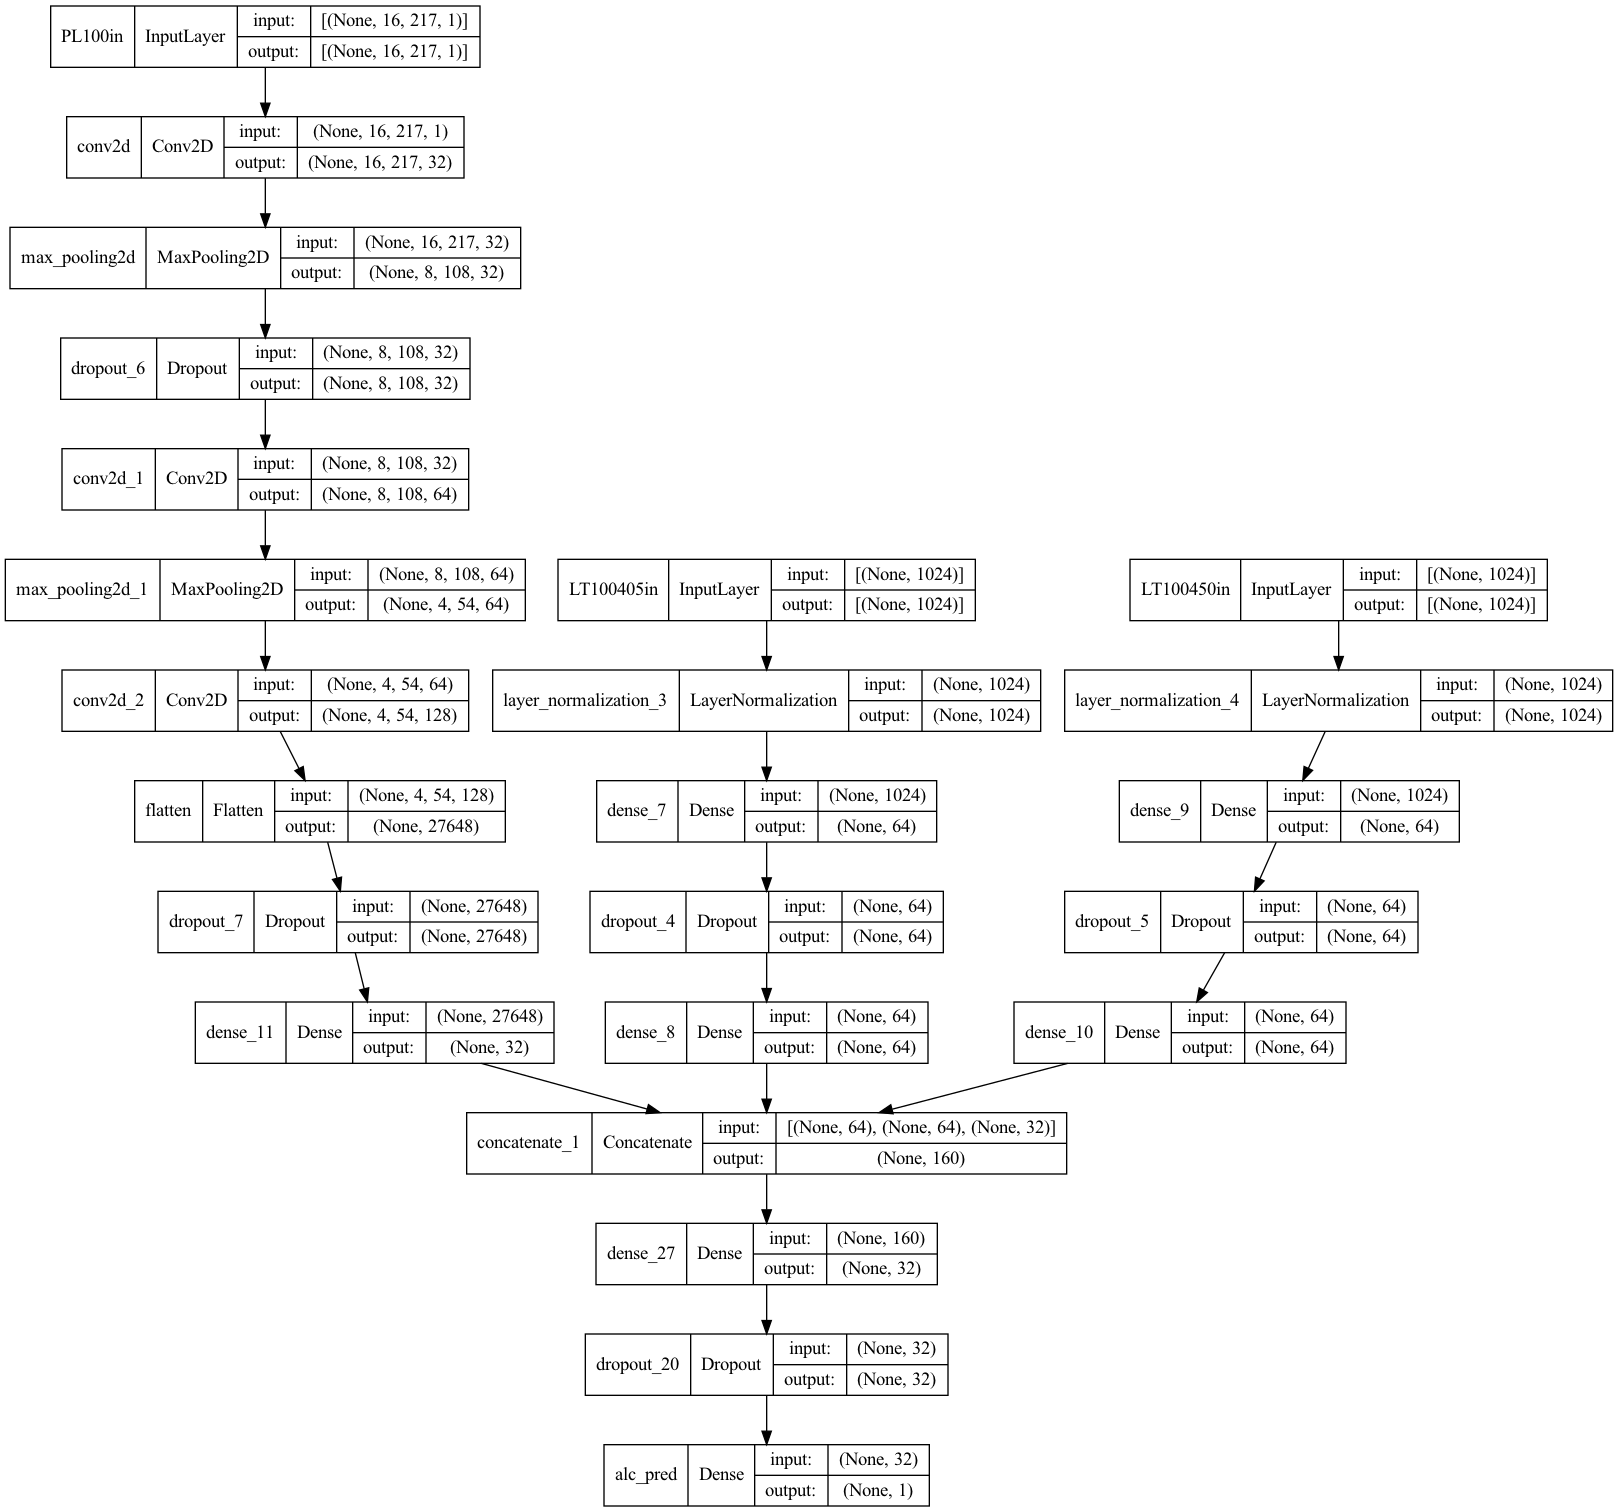

In [43]:
plot_model(model_PLthree, rankdir='TB',show_shapes=True,show_layer_names=True,to_file='PL_three_model.png')
plot_model(model_PL, rankdir='TB',show_shapes=True,show_layer_names=True,to_file='PL_model.png')
plot_model(model_duoLT_multi, rankdir='TB',show_shapes=True,show_layer_names=True,to_file='duoLT_multi_model.png')
plot_model(model_duoLT, rankdir='TB',show_shapes=True,show_layer_names=True,to_file='duoLT_model.png')
plot_model(model_singleLT, rankdir='TB',show_shapes=True,show_layer_names=True,to_file='singleLT_model.png')
plot_model(model_combiPL_multi, rankdir='TB',show_shapes=True,show_layer_names=True,to_file='combiPL_multi_model.png')
plot_model(model_combiPL_bg, rankdir='TB',show_shapes=True,show_layer_names=True,to_file='combiPL_bg_model.png')
plot_model(model_combiPL, rankdir='TB',show_shapes=True,show_layer_names=True,to_file='combiPL_model.png')


In [28]:
with tf.device('cpu:0'):
    History_duoLT=model_duoLT.fit(train.batch(32),validation_data=test.batch(4),callbacks=[model_checkpoint_callback_duo]
    ,epochs=2000)

Epoch 1/2000


/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['PL150in', 'LT150405in', 'LT150450in', 'PL100in', 'PL300in', 'LT300405in', 'LT300450in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
2022-04-19 22:54:31.779945: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 1s 19ms/step - loss: 57.0116 - mae: 56.9990 - val_loss: 56.1801 - val_mae: 56.1678
Epoch 2/2000
10/10 [==============================] - 0s 9ms/step - loss: 52.8207 - mae: 52.8087 - val_loss: 50.5822 - val_mae: 50.5704
Epoch 3/2000
10/10 [==============================] - 0s 9ms/step - loss: 46.5007 - mae: 46.4891 - val_loss: 42.1873 - val_mae: 42.1760
Epoch 4/2000
10/10 [==============================] - 0s 9ms/step - loss: 37.4033 - mae: 37.3921 - val_loss: 31.0230 - val_mae: 31.0121
Epoch 5/2000
10/10 [==============================] - 0s 13ms/step - loss: 27.3990 - mae: 27.3882 - val_loss: 23.0280 - val_mae: 23.0174
Epoch 6/2000
10/10 [==============================] - 0s 11ms/step - loss: 23.2532 - mae: 23.2428 - val_loss: 22.1833 - val_mae: 22.1731
Epoch 7/2000
10/10 [==============================] - 0s 11ms/step - loss: 23.3771 - mae: 23.3671 - val_loss: 21.5055 - val_mae: 21.4957
Epoch 8/2000
10/10 [==============================] - 0s 

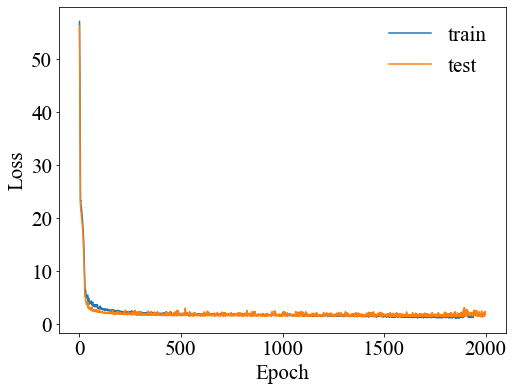

In [39]:
plt.figure(figsize=(8,6))
plt.plot(History_duoLT.history['loss'])
plt.plot(History_duoLT.history['val_loss'])
#plt.plot.set_facecolor('white')
#plt.title('CNN Bevset Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.xlim(0,500)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper right',frameon=False)

#plt.show()
plt.savefig('History_duoLT.png',facecolor='white',bbox_inches='tight',dpi=300)

In [31]:
model_duoLT.load_weights('weights/DNN_duoLT_1983-1.17.hdf5')

In [38]:
model_duoLT.evaluate(test.batch(1))

212/212 [==============================] - 0s 507us/step - loss: 1.1995 - mae: 1.1831


[1.199532389640808, 1.183119773864746]

In [32]:
model_duoLT.evaluate(bev.batch(1))

19/19 [==============================] - 0s 1ms/step - loss: 40.6230 - mae: 40.6111


[40.62298583984375, 40.61113357543945]

In [40]:
model_duoLT.save('model_duoLT2')

2022-04-05 21:22:57.928762: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_duoLT2/assets


INFO:tensorflow:Assets written to: model_duoLT2/assets


In [30]:
with tf.device('cpu:0'):
    History_singleLT=model_singleLT.fit(train.batch(32),validation_data=test.batch(1),callbacks=[model_checkpoint_callback_singleLT]
    ,epochs=2000)

Epoch 1/2000


/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['PL150in', 'LT150405in', 'LT150450in', 'PL100in', 'LT100405in', 'PL300in', 'LT300405in', 'LT300450in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


10/10 [==============================] - 1s 29ms/step - loss: 58.6766 - mae: 58.6751 - val_loss: 59.9857 - val_mae: 59.9843
Epoch 2/2000
10/10 [==============================] - 0s 15ms/step - loss: 58.6765 - mae: 58.6751 - val_loss: 59.9856 - val_mae: 59.9843
Epoch 3/2000
10/10 [==============================] - 0s 15ms/step - loss: 58.6765 - mae: 58.6751 - val_loss: 59.9856 - val_mae: 59.9843
Epoch 4/2000
10/10 [==============================] - 0s 14ms/step - loss: 58.6764 - mae: 58.6751 - val_loss: 59.9855 - val_mae: 59.9843
Epoch 5/2000
10/10 [==============================] - 0s 15ms/step - loss: 58.6763 - mae: 58.6751 - val_loss: 59.9855 - val_mae: 59.9843
Epoch 6/2000
10/10 [==============================] - 0s 14ms/step - loss: 58.6763 - mae: 58.6751 - val_loss: 59.9854 - val_mae: 59.9843
Epoch 7/2000
10/10 [==============================] - 0s 14ms/step - loss: 58.6762 - mae: 58.6751 - val_loss: 59.9853 - val_mae: 59.9843
Epoch 8/2000
10/10 [==============================] - 

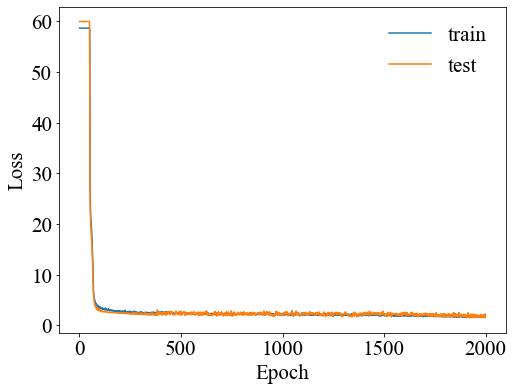

In [38]:
plt.figure(figsize=(8,6))
plt.plot(History_singleLT.history['loss'])
plt.plot(History_singleLT.history['val_loss'])
#plt.plot.set_facecolor('white')
#plt.title('CNN Bevset Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.xlim(0,500)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper right',frameon=False)

#plt.show()
plt.savefig('History_singleLT.png',facecolor='white',bbox_inches='tight',dpi=300)

In [29]:
model_singleLT.load_weights('weights/DNN_singleLT_1771-1.69.hdf5')
model_singleLT.evaluate(test.batch(1))

212/212 [==============================] - 0s 447us/step - loss: 1.6884 - mae: 1.6866


[1.6884175539016724, 1.6866412162780762]

In [30]:
model_singleLT.evaluate(bev.batch(1))

19/19 [==============================] - 0s 940us/step - loss: 30.4892 - mae: 30.4874


[30.489181518554688, 30.487403869628906]

In [48]:
model_singleLT.save('model_singleLT2')

INFO:tensorflow:Assets written to: model_singleLT2/assets


INFO:tensorflow:Assets written to: model_singleLT2/assets


In [34]:
with tf.device('cpu:0'):
    History_duoLT_multi=model_duoLT_multi.fit(train.batch(32),validation_data=test.batch(1),callbacks=[model_checkpoint_callback_duoLTmulti]
    ,epochs=2000)

Epoch 1/2000


/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['PL150in', 'PL100in', 'PL300in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


10/10 [==============================] - 1s 40ms/step - loss: 58.8169 - mae: 58.6751 - val_loss: 60.1071 - val_mae: 59.9843
Epoch 2/2000
10/10 [==============================] - 0s 18ms/step - loss: 58.7847 - mae: 58.6751 - val_loss: 60.0783 - val_mae: 59.9843
Epoch 3/2000
10/10 [==============================] - 0s 19ms/step - loss: 58.7585 - mae: 58.6751 - val_loss: 60.0555 - val_mae: 59.9843
Epoch 4/2000
10/10 [==============================] - 0s 18ms/step - loss: 58.7379 - mae: 58.6751 - val_loss: 60.0374 - val_mae: 59.9843
Epoch 5/2000
10/10 [==============================] - 0s 20ms/step - loss: 58.7219 - mae: 58.6751 - val_loss: 60.0236 - val_mae: 59.9843
Epoch 6/2000
10/10 [==============================] - 0s 21ms/step - loss: 58.7096 - mae: 58.6751 - val_loss: 60.0132 - val_mae: 59.9843
Epoch 7/2000
10/10 [==============================] - 0s 21ms/step - loss: 58.7003 - mae: 58.6751 - val_loss: 60.0052 - val_mae: 59.9843
Epoch 8/2000
10/10 [==============================] - 

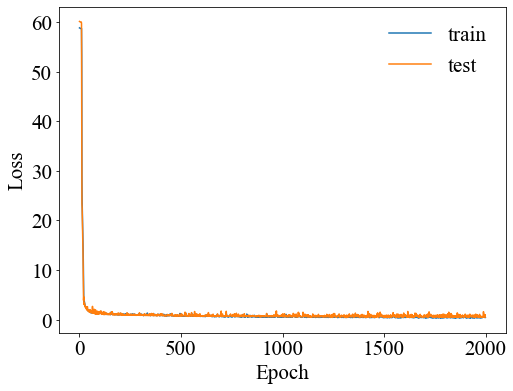

In [36]:
plt.figure(figsize=(8,6))
plt.plot(History_duoLT_multi.history['loss'])
plt.plot(History_duoLT_multi.history['val_loss'])
#plt.plot.set_facecolor('white')
#plt.title('CNN Bevset Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.xlim(0,500)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper right',frameon=False)

#plt.show()
plt.savefig('History_duoLT_multi.png',facecolor='white',bbox_inches='tight',dpi=300)

In [41]:
model_duoLT_multi.load_weights('weights/DNN_duoLT_multi_1982-0.44.hdf5')


In [42]:
model_duoLT_multi.evaluate(test.batch(1))

212/212 [==============================] - 0s 650us/step - loss: 0.4392 - mae: 0.4133


[0.43916842341423035, 0.41329169273376465]

In [43]:
model_duoLT_multi.evaluate(bev.batch(1))
model_duoLT_multi.save('model_duoLT_multi2')


19/19 [==============================] - 0s 1ms/step - loss: 12.2061 - mae: 12.1802


2022-04-11 18:44:11.185860: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_duoLT_multi2/assets


INFO:tensorflow:Assets written to: model_duoLT_multi2/assets


In [42]:
model_checkpoint_callback_modelPL = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/model?PL_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
with tf.device('gpu:0'):
    History_PL=model_PL.fit(train.batch(64),validation_data=test.batch(64),callbacks=[model_checkpoint_callback_modelPL]
    ,epochs=1000)



Epoch 1/1000


2022-04-19 21:52:47.983624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 2s 129ms/step - loss: 16.2402 - mae: 16.2402 - val_loss: 17.9600 - val_mae: 17.9600


2022-04-19 21:52:49.049531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/1000
5/5 [==============================] - 0s 49ms/step - loss: 12.2713 - mae: 12.2713 - val_loss: 11.8527 - val_mae: 11.8527
Epoch 3/1000
5/5 [==============================] - 0s 47ms/step - loss: 8.1794 - mae: 8.1794 - val_loss: 6.2692 - val_mae: 6.2692
Epoch 4/1000
5/5 [==============================] - 0s 45ms/step - loss: 6.4329 - mae: 6.4329 - val_loss: 5.4857 - val_mae: 5.4857
Epoch 5/1000
5/5 [==============================] - 0s 43ms/step - loss: 6.8384 - mae: 6.8384 - val_loss: 7.3030 - val_mae: 7.3030
Epoch 6/1000
5/5 [==============================] - 0s 46ms/step - loss: 6.0537 - mae: 6.0537 - val_loss: 6.2221 - val_mae: 6.2221
Epoch 7/1000
5/5 [==============================] - 0s 42ms/step - loss: 5.5702 - mae: 5.5702 - val_loss: 5.6348 - val_mae: 5.6348
Epoch 8/1000
5/5 [==============================] - 0s 44ms/step - loss: 5.2083 - mae: 5.2083 - val_loss: 5.9427 - val_mae: 5.9427
Epoch 9/1000
5/5 [==============================] - 0s 45ms/step - loss: 5.3337

In [29]:
model_PL.load_weights('weights/model?PL_869-1.19.hdf5')
model_PL.evaluate(test.batch(1))
model_PL.evaluate(bev.batch(1))
model_PL.save('model_PL2')

19/19 [==============================] - 0s 5ms/step - loss: 15.4699 - mae: 15.4699


2022-04-05 22:07:42.119682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-05 22:07:42.651958: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_PL2/assets


INFO:tensorflow:Assets written to: model_PL2/assets


In [46]:
model_checkpoint_callback_modelPL_combi = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/modelPL_combi_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
with tf.device('gpu:0'):
    History_combiPL=model_combiPL.fit(train.batch(64),validation_data=test.batch(64),callbacks=[model_checkpoint_callback_modelPL_combi]
    ,epochs=1000)

Epoch 1/1000


/Users/aaron/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['PL150in', 'LT150405in', 'LT150450in', 'PL300in', 'LT300405in', 'LT300450in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
2022-04-19 22:01:06.092046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 57.5134 - mae: 57.4615

2022-04-19 22:01:07.697795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 4s 199ms/step - loss: 57.5134 - mae: 57.4615 - val_loss: 62.3051 - val_mae: 62.2556
Epoch 2/1000
5/5 [==============================] - 0s 54ms/step - loss: 52.3937 - mae: 52.3452 - val_loss: 43.2520 - val_mae: 43.2048
Epoch 3/1000
5/5 [==============================] - 0s 50ms/step - loss: 22.3449 - mae: 22.2985 - val_loss: 16.1512 - val_mae: 16.1059
Epoch 4/1000
5/5 [==============================] - 0s 49ms/step - loss: 13.6540 - mae: 13.6095 - val_loss: 11.2031 - val_mae: 11.1596
Epoch 5/1000
5/5 [==============================] - 0s 57ms/step - loss: 11.7798 - mae: 11.7370 - val_loss: 8.5809 - val_mae: 8.5391
Epoch 6/1000
5/5 [==============================] - 0s 54ms/step - loss: 7.6839 - mae: 7.6427 - val_loss: 4.8302 - val_mae: 4.7899
Epoch 7/1000
5/5 [==============================] - 0s 46ms/step - loss: 6.2553 - mae: 6.2155 - val_loss: 5.1209 - val_mae: 5.0820
Epoch 8/1000
5/5 [==============================] - 0s 54ms/step - loss: 5.44

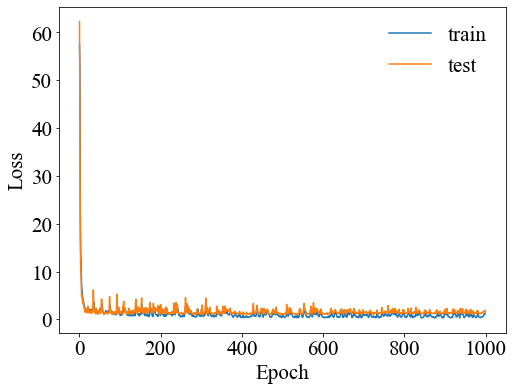

In [47]:
plt.figure(figsize=(8,6))
plt.plot(History_combiPL.history['loss'])
plt.plot(History_combiPL.history['val_loss'])
#plt.plot.set_facecolor('white')
#plt.title('CNN Bevset Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.xlim(0,500)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper right',frameon=False)

#plt.show()
plt.savefig('combi_PL_training.png',facecolor='white',bbox_inches='tight')

In [36]:
model_combiPL.load_weights('weights/modelPL_combi_136-0.92.hdf5')
model_combiPL.evaluate(test.batch(1))
model_combiPL.evaluate(bev.batch(1))
model_combiPL.save('model_combiPL2')

19/19 [==============================] - 0s 6ms/step - loss: 15.6563 - mae: 15.6563


INFO:tensorflow:Assets written to: model_combiPL2/assets


INFO:tensorflow:Assets written to: model_combiPL2/assets


In [48]:
model_checkpoint_callback_modelPLthree = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/model_PLthree_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
with tf.device('gpu:0'):
    History_PLthree=model_PLthree.fit(train.batch(64),validation_data=test.batch(64),callbacks=[model_checkpoint_callback_modelPLthree]
    ,epochs=1000)

Epoch 1/1000


/Users/aaron/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['LT150405in', 'LT150450in', 'LT100405in', 'LT100450in', 'LT300405in', 'LT300450in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
2022-04-19 22:07:59.344663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 35.0539 - mae: 35.0539

2022-04-19 22:08:01.110343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 3s 246ms/step - loss: 35.0539 - mae: 35.0539 - val_loss: 5.6797 - val_mae: 5.6797
Epoch 2/1000
5/5 [==============================] - 0s 89ms/step - loss: 23.2070 - mae: 23.2070 - val_loss: 13.9430 - val_mae: 13.9430
Epoch 3/1000
5/5 [==============================] - 0s 90ms/step - loss: 19.0485 - mae: 19.0485 - val_loss: 6.3978 - val_mae: 6.3978
Epoch 4/1000
5/5 [==============================] - 0s 92ms/step - loss: 15.9978 - mae: 15.9978 - val_loss: 7.5607 - val_mae: 7.5607
Epoch 5/1000
5/5 [==============================] - 0s 101ms/step - loss: 12.7187 - mae: 12.7187 - val_loss: 4.6508 - val_mae: 4.6508
Epoch 6/1000
5/5 [==============================] - 0s 91ms/step - loss: 11.1442 - mae: 11.1442 - val_loss: 4.7955 - val_mae: 4.7955
Epoch 7/1000
5/5 [==============================] - 0s 91ms/step - loss: 9.9554 - mae: 9.9554 - val_loss: 4.9809 - val_mae: 4.9809
Epoch 8/1000
5/5 [==============================] - 0s 102ms/step - loss: 8.5603

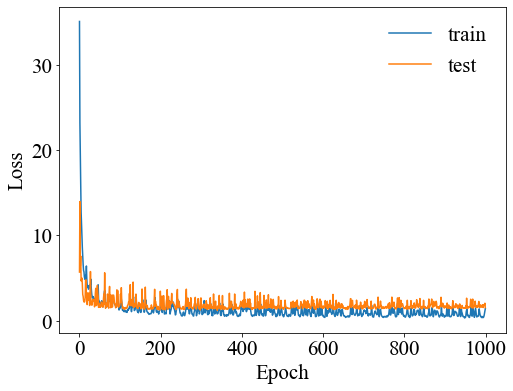

In [49]:
plt.figure(figsize=(8,6))
plt.plot(History_PLthree.history['loss'])
plt.plot(History_PLthree.history['val_loss'])
#plt.plot.set_facecolor('white')
#plt.title('CNN Bevset Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.xlim(0,500)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper right',frameon=False)

#plt.show()
plt.savefig('PLthree_training.png',facecolor='white',bbox_inches='tight')

In [42]:
model_PLthree.load_weights('weights/model_PLthree_57-1.06.hdf5')
model_PLthree.evaluate(test.batch(1))
model_PLthree.evaluate(bev.batch(1))
model_PLthree.save('model_PLthree2')

19/19 [==============================] - 0s 7ms/step - loss: 14.0240 - mae: 14.0240


INFO:tensorflow:Assets written to: model_PLthree2/assets


INFO:tensorflow:Assets written to: model_PLthree2/assets


In [52]:
model_checkpoint_model_combiPL_multi = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/model_combiPL_multi_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
with tf.device('gpu:0'):
    History_combiPL_multi=model_combiPL_multi.fit(train.batch(64),validation_data=test.batch(64),callbacks=[model_checkpoint_model_combiPL_multi]
    ,epochs=1000)

Epoch 1/1000


2022-04-19 22:17:50.634311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 22.7535 - mae: 22.6453

2022-04-19 22:17:53.351473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 4s 388ms/step - loss: 22.7535 - mae: 22.6453 - val_loss: 11.5939 - val_mae: 11.4917
Epoch 2/1000
5/5 [==============================] - 1s 128ms/step - loss: 15.0731 - mae: 14.9745 - val_loss: 11.0925 - val_mae: 10.9993
Epoch 3/1000
5/5 [==============================] - 1s 126ms/step - loss: 11.9707 - mae: 11.8806 - val_loss: 4.1912 - val_mae: 4.1058
Epoch 4/1000
5/5 [==============================] - 1s 122ms/step - loss: 9.8593 - mae: 9.7767 - val_loss: 2.8254 - val_mae: 2.7469
Epoch 5/1000
5/5 [==============================] - 1s 116ms/step - loss: 8.3035 - mae: 8.2274 - val_loss: 3.1464 - val_mae: 3.0739
Epoch 6/1000
5/5 [==============================] - 1s 110ms/step - loss: 7.8097 - mae: 7.7393 - val_loss: 6.5298 - val_mae: 6.4625
Epoch 7/1000
5/5 [==============================] - 1s 113ms/step - loss: 7.2205 - mae: 7.1550 - val_loss: 2.8684 - val_mae: 2.8055
Epoch 8/1000
5/5 [==============================] - 1s 121ms/step - loss: 6.596

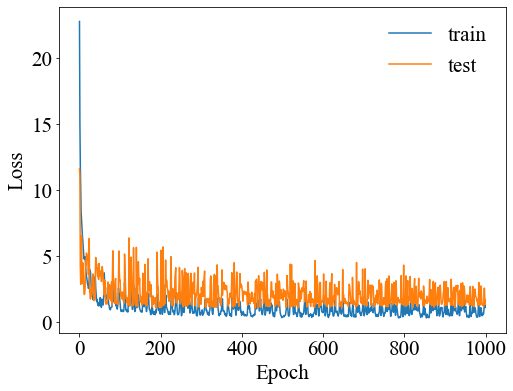

In [53]:
plt.figure(figsize=(8,6))
plt.plot(History_combiPL_multi.history['loss'])
plt.plot(History_combiPL_multi.history['val_loss'])
#plt.plot.set_facecolor('white')
#plt.title('CNN Bevset Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.xlim(0,500)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper right',frameon=False)

#plt.show()
plt.savefig('combiPL_multi_training.png',facecolor='white',bbox_inches='tight')

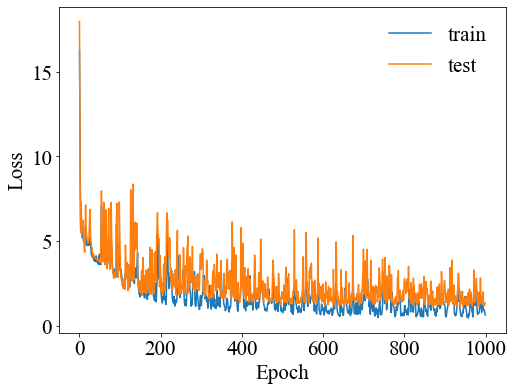

In [45]:
plt.figure(figsize=(8,6))
plt.plot(History_PL.history['loss'])
plt.plot(History_PL.history['val_loss'])
#plt.plot.set_facecolor('white')
#plt.title('CNN Bevset Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.xlim(0,500)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper right',frameon=False)

#plt.show()
plt.savefig('CNN_bevset_training_1000_2.png',facecolor='white',bbox_inches='tight')

In [39]:
#model_combiPL_multi
model_combiPL_multi.load_weights('weights/model_combiPL_multi_22-0.80.hdf5')
model_combiPL_multi.evaluate(test.batch(1))
model_combiPL_multi.evaluate(bev.batch(1))
model_combiPL_multi.save('model_combiPLthree2')

19/19 [==============================] - 0s 10ms/step - loss: 8.3360 - mae: 8.3314


2022-04-06 01:30:22.568892: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_combiPLthree2/assets


INFO:tensorflow:Assets written to: model_combiPLthree2/assets


In [58]:
model_checkpoint_model_combiPL_bg = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/model_combiPL_bg_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
with tf.device('gpu:0'):
    History_combiPL_bg=model_combiPL_bg.fit(train.batch(64),validation_data=test.batch(64),callbacks=[model_checkpoint_model_combiPL_bg]
    ,epochs=1000)

Epoch 1/1000


2022-04-19 22:31:08.735956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 15.2145 - mae: 15.1035

2022-04-19 22:31:18.555057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 13s 1s/step - loss: 15.2145 - mae: 15.1035 - val_loss: 8.4893 - val_mae: 8.3856
Epoch 2/1000
5/5 [==============================] - 2s 379ms/step - loss: 11.1537 - mae: 11.0543 - val_loss: 5.6959 - val_mae: 5.6030
Epoch 3/1000
5/5 [==============================] - 1s 215ms/step - loss: 9.8363 - mae: 9.7471 - val_loss: 6.3566 - val_mae: 6.2728
Epoch 4/1000
5/5 [==============================] - 1s 190ms/step - loss: 8.8587 - mae: 8.7782 - val_loss: 3.4041 - val_mae: 3.3284
Epoch 5/1000
5/5 [==============================] - 1s 174ms/step - loss: 8.0983 - mae: 8.0254 - val_loss: 4.0175 - val_mae: 3.9485
Epoch 6/1000
5/5 [==============================] - 1s 197ms/step - loss: 7.3515 - mae: 7.2849 - val_loss: 2.5631 - val_mae: 2.4998
Epoch 7/1000
5/5 [==============================] - 1s 159ms/step - loss: 6.8927 - mae: 6.8313 - val_loss: 3.6739 - val_mae: 3.6154
Epoch 8/1000
5/5 [==============================] - 1s 227ms/step - loss: 6.3245 - mae:

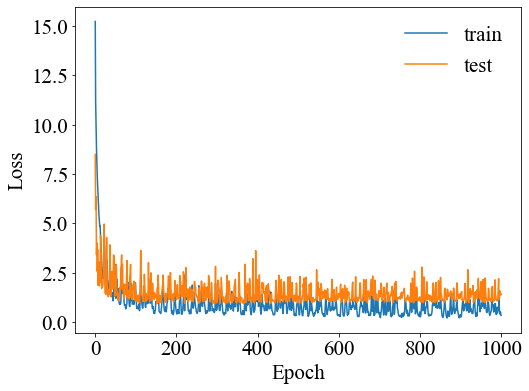

In [59]:
plt.figure(figsize=(8,6))
plt.plot(History_combiPL_bg.history['loss'])
plt.plot(History_combiPL_bg.history['val_loss'])
#plt.plot.set_facecolor('white')
#plt.title('CNN Bevset Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.xlim(0,500)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper right',frameon=False)

#plt.show()
plt.savefig('combiPL_bg_training_1000_2.png',facecolor='white',bbox_inches='tight')

In [28]:
model_combiPL_bg.load_weights('weights/model_combiPL_bg_348-1.06.hdf5')
model_combiPL_bg.evaluate(test.batch(1))
model_combiPL_bg.evaluate(bev.batch(1))
#model_combiPL_bg.save('model_combiPLbg2')

2022-04-19 19:06:07.733487: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-19 19:06:07.734657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


212/212 [==============================] - 3s 11ms/step - loss: 1.0389 - mae: 1.0020


2022-04-19 19:06:10.544382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 1s 12ms/step - loss: 8.3726 - mae: 8.3356


[8.372566223144531, 8.335597038269043]

In [82]:
K.clear_session()


In [43]:
#model_combiPL_bg.load_weights('weights/bg_drop_453-5.76.hdf5')
#model_combiPL_bg.save("bg_model_noreg_bev576")

INFO:tensorflow:Assets written to: bg_model_noreg_bev576/assets


INFO:tensorflow:Assets written to: bg_model_noreg_bev576/assets


In [66]:
model_combiPLbg=tf.keras.models.load_model("model_combiPLbg")

In [33]:
model_combiPLbg.evaluate(test.batch(1))
pred=model_combiPLbg.predict(test.batch(1))

2022-04-04 14:58:51.165906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


212/212 [==============================] - 3s 12ms/step - loss: 10.7605 - mae: 10.7558


2022-04-04 14:58:54.280088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


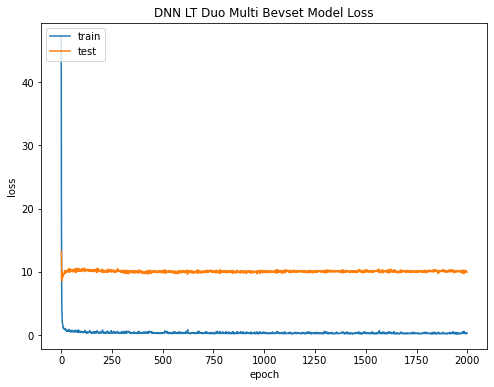

In [125]:
plt.figure(figsize=(8,6))
plt.plot(History_duoLT_multi.history['loss'])
plt.plot(History_duoLT_multi.history['val_loss'])
#plt.plot.set_facecolor('white')
plt.title('DNN LT Duo Multi Bevset Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.xlim(0,200)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper left')

#plt.show()
plt.savefig('DNN_duo_multi_bevset_training_2000_2.png',facecolor='white')

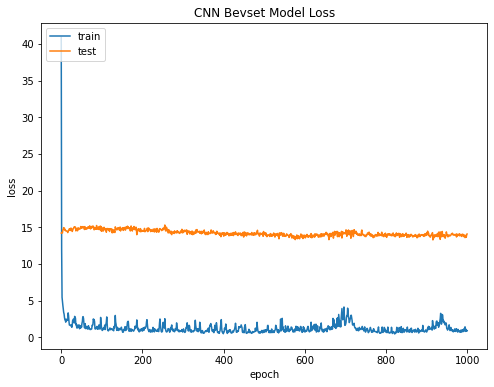

In [119]:
plt.figure(figsize=(8,6))
plt.plot(History_PL.history['loss'])
plt.plot(History_PL.history['val_loss'])
#plt.plot.set_facecolor('white')
plt.title('CNN Bevset Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.xlim(0,500)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper left')

#plt.show()
plt.savefig('CNN_bevset_training_1000.png',facecolor='white')

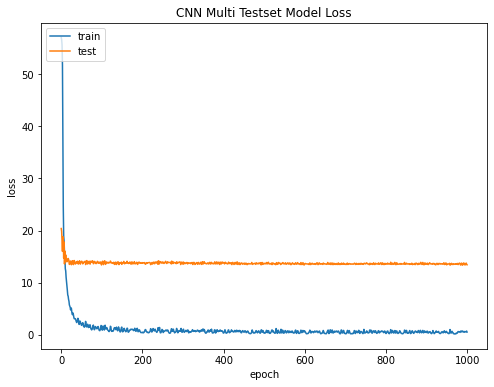

In [35]:
plt.figure(figsize=(8,6))
plt.plot(History_PLthree_bev.history['loss'])
plt.plot(History_PLthree_bev.history['val_loss'])
#plt.plot.set_facecolor('white')
plt.title('CNN Multi Testset Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper left')

#plt.show()
plt.savefig('CNN_multi_bev_training_1000.png',facecolor='white')

In [30]:
# plt.figure(figsize=(8,6))
# plt.plot(History2.history['loss'])
# plt.plot(History2.history['val_loss'])
# #plt.plot.set_facecolor('white')
# plt.title('CNN/DNN Combi Map Model Loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# #plt.yscale("log")
# plt.legend(['train', 'test'], loc='upper left')

# # plt.show()
# #plt.savefig('CNN_DNN_combi_training_500.png',facecolor='white')

In [71]:
model_combiPLbg.evaluate(bev.batch(1))
pred=model_combiPLbg.predict(bev.batch(1))

19/19 [==============================] - 0s 4ms/step - loss: 6.6780 - mae: 6.6780


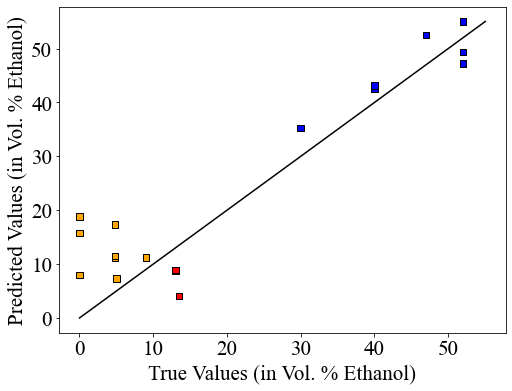

In [77]:
fig, ax = plt.subplots(figsize=(8,6))#plt.figure(figsize=(8,6))

col = np.where(bevlabels100PL<12,'orange',np.where(bevlabels100PL<25,'red','blue'))
ax.scatter(bevlabels100PL,pred,c=np.squeeze(col),marker='s',edgecolor='black',s=42)
# plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
p1 = max(max(pred), max(bevlabels100PL))
p2 = min(min(pred), min(bevlabels100PL))
ax.plot([p1, p2], [p1, p2],color='black')#, 'b-')


plt.xlabel('True Values (in Vol. % Ethanol)')
plt.ylabel('Predicted Values (in Vol. % Ethanol)')
#plt.title('CNN/DNN Background Beverage Accuracy')

#for label, x, y in zip(beverages['beverage'].tolist(), bevlabels100PL, pred):
#    plt.annotate(
#        label,
#        xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom',
#        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
#texts=[]
#for label, x, y in zip(beverages['beverage'].tolist(), bevlabels100PL, pred):
#    texts.append(ax.text(x, y, label))
#at.adjust_text(texts,force_text=(0.4,0.4),force_points=(0.1,0.1),precision=0.001,only_move={'points':'', 'text':'xy', 'objects':''})#arrowprops=dict(arrowstyle='->', color='red')
#plt.show()

#plt.show()
# plt.legend(['measured', 'fit (mae 7.6%)'], loc='upper right')
plt.savefig("CNNN_DNN_combi_bg_accuracy_bev_2.png",facecolor='white',dpi=300,bbox_inches="tight")

In [82]:
model_combiPLbg=models.load_model("model_combiPLbg")

In [83]:
model_combiPLbg.evaluate(bev.batch(1))
pred=model_combiPLbg.predict(bev.batch(1))

19/19 [==============================] - 0s 4ms/step - loss: 7.6567 - mae: 7.6520


In [55]:
np.squeeze(pred)-np.squeeze(bevlabels100PL)

array([ -2.23365021,  10.25856757,  -4.38999176,  -2.51699448,
         5.0226655 ,  -0.89870453, -15.51097107, -12.81071587,
        -1.24242163, -19.1987896 ,  -5.7792799 ,  -2.26792908,
        -7.27971697,  -1.38978958,   4.07971478,   8.14947939,
        -4.113517  ,   4.31702423,   5.50411224])

In [57]:
[beverages['beverage'].tolist(),np.abs(np.squeeze(pred)-np.squeeze(bevlabels100PL))]

[['absolut',
  'whitewine',
  'bombaygin',
  'luzhoulaojiao',
  'whitewine2',
  'chimay',
  'bitburgerdrive',
  'bitburgerpils',
  'chang',
  'bitburgerdrive',
  'bitburgerpils',
  'limoncello',
  'bitburgerdrive',
  'absolut',
  'whitewine2',
  'whitewine',
  'bitburgerpils',
  'luzhoulaojiao',
  'luzhoulaojiao'],
 array([ 2.23365021, 10.25856757,  4.38999176,  2.51699448,  5.0226655 ,
         0.89870453, 15.51097107, 12.81071587,  1.24242163, 19.1987896 ,
         5.7792799 ,  2.26792908,  7.27971697,  1.38978958,  4.07971478,
         8.14947939,  4.113517  ,  4.31702423,  5.50411224])]

In [41]:
beverages['beverage'].tolist()

['absolut',
 'whitewine',
 'bombaygin',
 'luzhoulaojiao',
 'whitewine2',
 'chimay',
 'bitburgerdrive',
 'bitburgerpils',
 'chang',
 'bitburgerdrive',
 'bitburgerpils',
 'limoncello',
 'bitburgerdrive',
 'absolut',
 'whitewine2',
 'whitewine',
 'bitburgerpils',
 'luzhoulaojiao',
 'luzhoulaojiao']

In [29]:
model_combiPL_bg.evaluate(test.batch(1))
predsol=model_combiPL_bg.predict(test.batch(1))

212/212 [==============================] - 2s 11ms/step - loss: 1.0389 - mae: 1.0020


2022-04-19 19:06:33.307132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_29600/28002059.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  ax.scatter(np.squeeze(np.vstack(tfds.as_numpy(testlabel))),predsol,marker='s',edgecolor='black',s=42)
/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_29600/28002059.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  p1 = max(max(predsol), max(np.squeeze(np.vstack(tfds.as_numpy(testlabel)))))
/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_29600/28002059.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is de

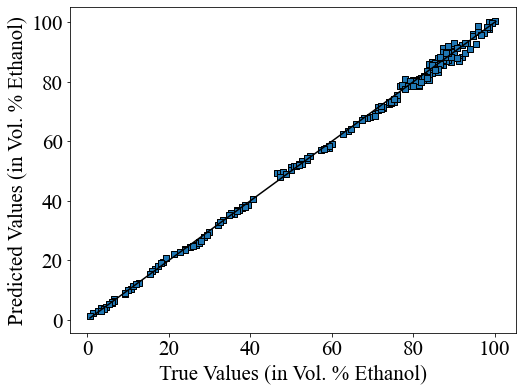

In [32]:
fig, ax = plt.subplots(figsize=(8,6))#plt.figure(figsize=(8,6))

ax.scatter(np.squeeze(np.vstack(tfds.as_numpy(testlabel))),predsol,marker='s',edgecolor='black',s=42)
# plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
p1 = max(max(predsol), max(np.squeeze(np.vstack(tfds.as_numpy(testlabel)))))
p2 = min(min(predsol), min(np.squeeze(np.vstack(tfds.as_numpy(testlabel)))))
ax.plot([p1, p2], [p1, p2],color='black')#, 'b-')


plt.xlabel('True Values (in Vol. % Ethanol)')
plt.ylabel('Predicted Values (in Vol. % Ethanol)')
#plt.title('CNN/DNN Background Beverage Accuracy')

#for label, x, y in zip(beverages['beverage'].tolist(), bevlabels100PL, pred):
#    plt.annotate(
#        label,
#        xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom',
#        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
#texts=[]
#for label, x, y in zip(beverages['beverage'].tolist(), bevlabels100PL, pred):
#    texts.append(ax.text(x, y, label))
#at.adjust_text(texts,force_text=(0.4,0.4),force_points=(0.1,0.1),precision=0.001,only_move={'points':'', 'text':'xy', 'objects':''})#arrowprops=dict(arrowstyle='->', color='red')
#plt.show()

#plt.show()
# plt.legend(['measured', 'fit (mae 7.6%)'], loc='upper right')
plt.savefig("CNNN_DNN_combi_bg_accuracy_test.png",facecolor='white',dpi=300,bbox_inches="tight")